libray

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

Load the CSV

In [51]:
df = pd.read_csv("user_goal_dataset_3000.csv")

Explore the structure

In [52]:
print(df.shape)
print(df.columns)
print(df['risk_profile'].value_counts())
print(df['goal'].unique())
print(df['selected_instrument'].value_counts())

(3000, 9)
Index(['age', 'salary', 'savings', 'risk_profile', 'goal', 'goal_amount',
       'years_to_goal', 'selected_instrument', 'outcome'],
      dtype='object')
risk_profile
Medium    1153
Low        985
High       862
Name: count, dtype: int64
['Emergency Fund' 'Buy a House' 'Child Education' 'Retirement'
 'Travel Abroad' 'Tax Saving' 'Car Purchase']
selected_instrument
PPF                     345
FD                      264
Debt Mutual Fund        262
ELSS Mutual Fund        244
Savings Account         240
RD                      233
Liquid Mutual Fund      219
ULIP                    218
Balanced Mutual Fund    206
Equity Mutual Fund      199
Gold ETF                192
NPS                     192
Sukanya Samriddhi       186
Name: count, dtype: int64


Check a sample

In [53]:
df.head(10)


,age,salary,savings,risk_profile,goal,goal_amount,years_to_goal,selected_instrument,outcome
0,42,88031,488181,Medium,Emergency Fund,8552892,13,RD,Partial
1,44,51632,292552,Medium,Buy a House,4058626,23,Debt Mutual Fund,Partial
2,31,99550,449206,Low,Child Education,8122530,11,Balanced Mutual Fund,Success
3,28,146253,91262,Medium,Child Education,4727535,9,PPF,Failed
4,22,93731,113669,Medium,Retirement,4863042,25,PPF,Success
5,31,131535,48207,Low,Travel Abroad,7904195,7,Gold ETF,Partial
6,58,96145,24443,Low,Tax Saving,9861427,21,ELSS Mutual Fund,Success
7,40,96431,81390,Medium,Child Education,1513630,25,PPF,Success
8,49,42660,229700,Low,Emergency Fund,2587293,18,RD,Partial
9,40,62956,368133,Medium,Buy a House,8529406,2,PPF,Success


In [54]:
# Encode categorical features
label_cols = ['risk_profile', 'goal', 'selected_instrument', 'outcome']
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le 

# Define features and label
X = df[['age', 'salary', 'savings', 'risk_profile', 'goal', 'goal_amount', 'years_to_goal']]
y = df['selected_instrument']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(df['selected_instrument'].unique()), max_depth=6)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Optional: save model and encoders
import joblib
joblib.dump(model, "xgb_investment_model.pkl")
joblib.dump(encoders, "xgb_label_encoders.pkl")

🎯 Accuracy: 0.15666666666666668

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.15      0.15        41
           1       0.18      0.24      0.21        50
           2       0.17      0.13      0.15        54
           3       0.14      0.12      0.13        32
           4       0.14      0.12      0.13        57
           5       0.08      0.09      0.09        33
           6       0.16      0.15      0.15        46
           7       0.22      0.20      0.21        46
           8       0.21      0.31      0.25        65
           9       0.09      0.09      0.09        44
          10       0.15      0.13      0.14        53
          11       0.09      0.08      0.08        39
          12       0.15      0.12      0.14        40

    accuracy                           0.16       600
   macro avg       0.15      0.15      0.15       600
weighted avg       0.15      0.16      0.15       600



['xgb_label_encoders.pkl']

C:\Users\Bhanuprakash\AppData\Local\Temp\ipykernel_18324\4158443802.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Bhanuprakash\AppData\Local\Temp\ipykernel_18324\4158443802.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Bhanuprakash\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


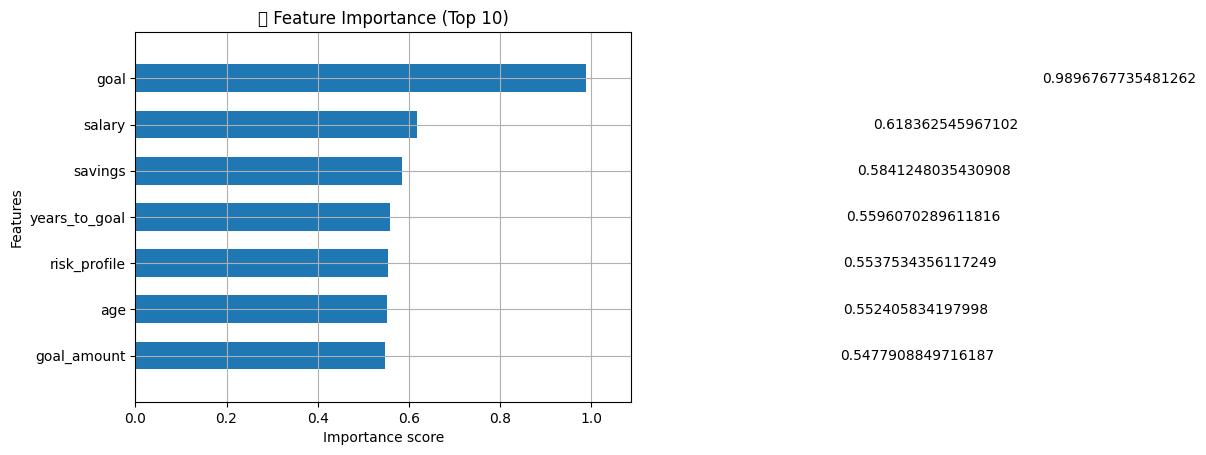

In [55]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model, importance_type='gain', height=0.6, max_num_features=10)
plt.title("🔍 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()


In [56]:
importance = model.feature_importances_
for feature, score in zip(X.columns, importance):
    print(f"{feature}: {score:.4f}")


age: 0.1254
salary: 0.1404
savings: 0.1326
risk_profile: 0.1257
goal: 0.2246
goal_amount: 0.1243
years_to_goal: 0.1270


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the goal training data
df = pd.read_csv("goal_training_data_v2.csv")

# Features and label
X = df["goal_description"]
y = df["label"]

# Text vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train the classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Save model and vectorizer
joblib.dump(model, "goal_classifier.pkl")
joblib.dump(vectorizer, "goal_vectorizer.pkl")


✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        18

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



['goal_vectorizer.pkl']

In [58]:
# import pandas as pd
# import random

# goal_categories = {
#     0: "Retirement",
#     1: "Buy a House",
#     2: "Child Education",
#     3: "Emergency Fund",
#     4: "Tax Saving",
#     5: "Car Purchase",
#     6: "Travel Abroad"
# }

# # Expanded training phrases per goal (100+ each)
# goal_phrases = {
#     0: [
#         "plan to retire by 55", "saving for pension", "early retirement planning", 
#         "want to quit job in future", "future without work", "no income after 60",
#         "retire soon", "saving for post-work life", "need pension support", "retire with dignity"
#     ],
#     1: [
#         "buy a home", "purchase flat", "getting our own house", "need home loan", 
#         "moving to a new house", "house for parents", "settling down", "build a house", 
#         "real estate investment", "own property soon"
#     ],
#     2: [
#         "daughter's college", "school admission for child", "university fees", 
#         "kids education", "save for son’s future", "ICSE school fees", "MBA funding", 
#         "tuition support", "college savings", "boarding school cost"
#     ],
#     3: [
#         "emergency savings", "unexpected expenses", "hospital money", "rainy day fund", 
#         "backup cash", "medical emergency support", "urgent financial need", 
#         "save for unknown events", "car repair savings", "emergency money"
#     ],
#     4: [
#         "saving under 80C", "tax deductions", "reduce income tax", 
#         "get tax benefits", "invest to save tax", "section 80C options", 
#         "income tax planning", "avoid paying more tax", "financial year saving", 
#         "smart tax-saving investment"
#     ],
#     5: [
#         "buy car", "bike purchase", "own a vehicle", "dream scooter", 
#         "four wheeler savings", "vehicle loan downpayment", "purchase new ride", 
#         "saving for new car", "EV car plan", "need bike urgently"
#     ],
#     6: [
#         "trip to bali", "honeymoon savings", "europe vacation", "holiday in thailand", 
#         "trip with family", "save for international trip", "next year travel", 
#         "vacation savings", "visit new countries", "travel fund"
#     ]
# }

# # Generate dataset
# samples = []
# for label, phrases in goal_phrases.items():
#     for _ in range(80):  # 80 x 7 = 560 samples
#         phrase = random.choice(phrases)
#         samples.append({
#             "goal_description": phrase,
#             "label": label,
#             "label_name": goal_categories[label]
#         })

# df = pd.DataFrame(samples)
# df.to_csv("goal_training_data_v2.csv", index=False)
# print("✅ Expanded dataset created: goal_training_data_v2.csv")
